In [ ]:
def datagenerate(df):
    train_result={}
    test_result={}
    for k in range(df.shape[0]):
        train_result[df.index[k]]={}
        test_result[df.index[k]]={}
        for l in range(1,df.shape[1]):
            r=[]
            for i in df.iloc[k,l].strip('][,').split(','):
                r.append(float(''.join(i.split())))
            train_result[df.index[k]][df.columns[l]]=r[0]
            test_result[df.index[k]][df.columns[l]]=r[1]
    train_result=pd.DataFrame(train_result,columns=df.index)
    test_result=pd.DataFrame(test_result,columns=df.index)
    return train_result,test_result

In [1]:
def accuracy_loss_plot_imdb(learning_rate,setup):
    if setup==0:
        df=pd.read_pickle('/home/vivek.trivedi/accuracy_loss_list_RNN.pkl')
    elif setup==1:
        df=pd.read_pickle('/home/vivek.trivedi/accuracy_loss_list_gru.pkl')
    elif setup==2:
        df=pd.read_pickle('/home/vivek.trivedi/accuracy_loss_list_lstm.pkl')
    if learning_rate not in df.keys():
        return 'not found'
    fig, axs = plt.subplots(1,2, figsize=(20,10))
    vi=np.array(list(df[learning_rate].values()))
    axs[0].plot(range(len(list(df[learning_rate].keys()))),vi[:,0,0,0],marker='o',label='train')
    axs[0].plot(range(len(list(df[learning_rate].keys()))),vi[:,0,1,0],marker='o',label='test')
    axs[1].plot(range(len(list(df[learning_rate].keys()))),vi[:,0,0,1],marker='o',label='train')
    axs[1].plot(range(len(list(df[learning_rate].keys()))),vi[:,0,1,1],marker='o',label='test')
    axs[0].set(xlabel='hidden size',ylabel='accuracy',xticks=range(len(list(df[learning_rate].keys()))),xticklabels=[64*i for i in range(1,6)])
    axs[1].set(xlabel='hidden size',ylabel='loss',xticks=range(len(list(df[learning_rate].keys()))),xticklabels=[64*i for i in range(1,6)])
    for ax in axs:
        ax.tick_params(axis='x', rotation=90)
    for i,j in zip(range(len(range(len(list(df[learning_rate].keys()))))),range(len(vi[:,0,0,0]))):
        axs[0].annotate(str(round(vi[:,0,0,0][j],3)),(i,vi[:,0,0,0][j]))
    for i,j in zip(range(len(range(len(list(df[learning_rate].keys()))))),range(len(vi[:,0,1,0]))):
        axs[0].annotate(str(round(vi[:,0,1,0][j],3)),(i,vi[:,0,1,0][j]))
    for i,j in zip(range(len(range(len(list(df[learning_rate].keys()))))),range(len(vi[:,0,0,1]))):
        axs[1].annotate(str(round(vi[:,0,0,1][j],3)),(i,vi[:,0,0,1][j]))
    for i,j in zip(range(len(range(len(list(df[learning_rate].keys()))))),range(len(vi[:,0,1,1]))):
        axs[1].annotate(str(round(vi[:,0,1,1][j],3)),(i,vi[:,0,1,1][j]))
    plt.legend()
    plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install ipywidgets
from ipywidgets import interact, widgets

Defaulting to user installation because normal site-packages is not writeable


interactive(children=(Dropdown(description='learning_rate', options=(1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 1…

<function __main__.accuracy_loss_plot_imdb(learning_rate, setup)>

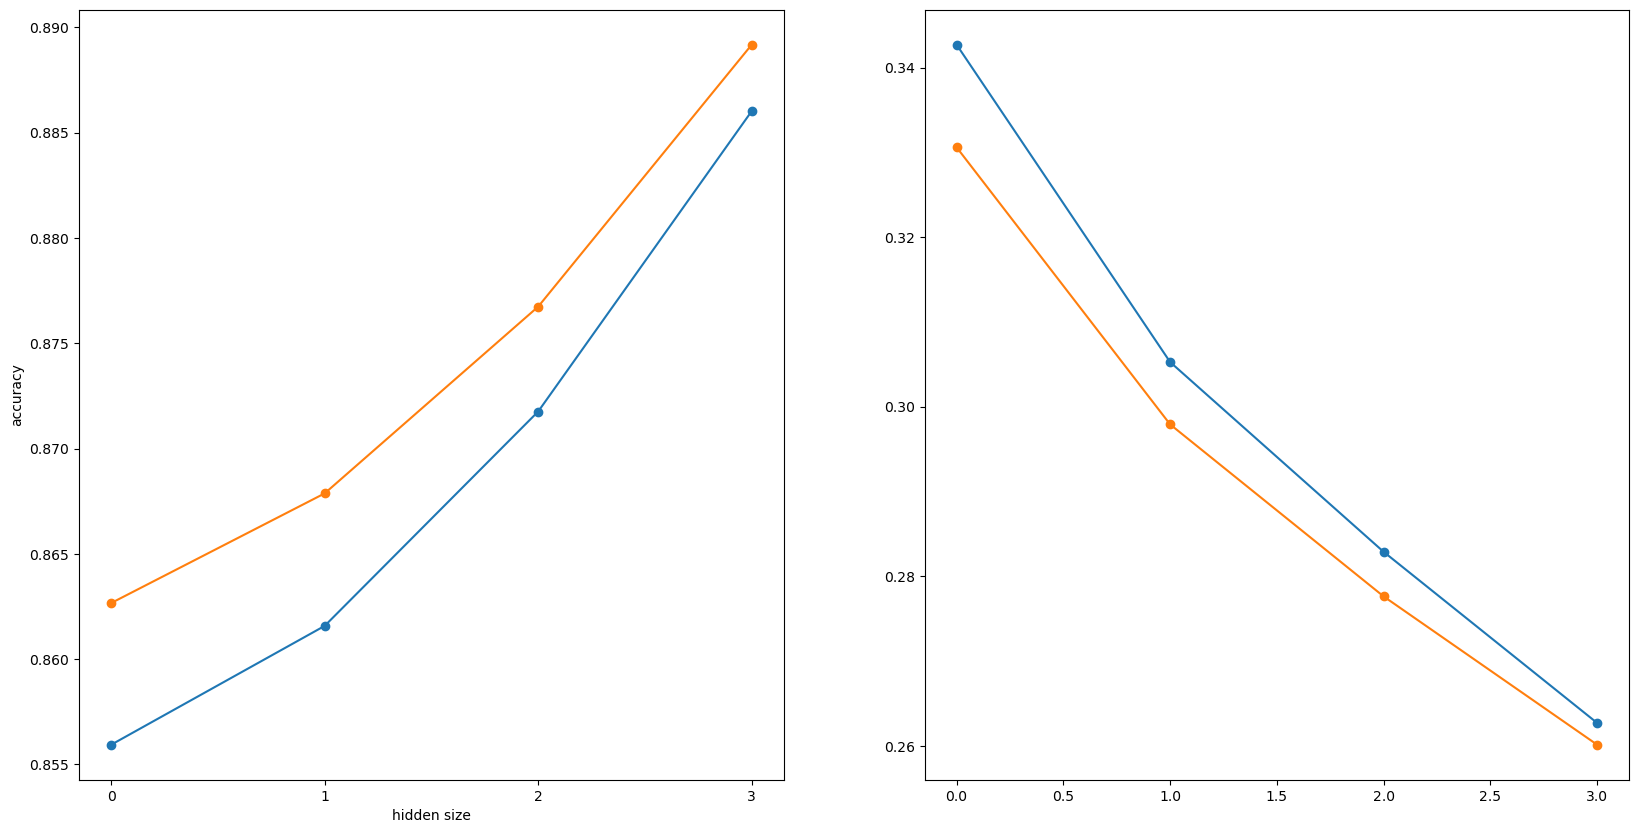

In [5]:
learning_rate_dict=[1e-5,1e-4,1e-3,1e-2,0.1,1,10,100,1000]
setup_dict={'RNN':0,'GRU':1,'LSTM':2}
interact(accuracy_loss_plot_imdb, learning_rate=widgets.Dropdown(options=learning_rate_dict),setup=widgets.Dropdown(options=setup_dict))